<a href="https://colab.research.google.com/github/cavendano01/Statistical-Learning-II/blob/main/Dimensionality_curse/SL_II_Practica_3_Dimensionality_curse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

Ver descripción al final de presentación: Clase_05_intro_DL
* Maldición de dimensionalidad:
  * Usando el dataset de precios de casas
  * Usar PolynomialFeatures de sklearn para calcular features polinómicas y analizar la dimensionalidad resultante al usar polinomios de grado 1(no transformación),2,3 para 1,2,3 variables de entrada(cualquiera)
  * No se necesita entrenar ningún modelo, solo analizar el comportamiento del número de dimensiones(por ejemplo usando plots comparativos)
* (Opcional)Repaso mate de licenciatura:
  * Funciones compuestas. 
  * Derivación de funciones compuestas(regla de la cadena) 
  * Funciones multivariable-escalares(muchas variables de entrada, un escalar de salida) 
  * Funciones multivariable-vectoriales(muchas variables de entrada, un vector de salida)


In [2]:
#Data Loading
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
#Loading np array to access data
data = np.load('/content/drive/MyDrive/Statistical Learning O/Practica 1 - TensorFlow y TensorBoard/proyecto_training_data.npy')

In [4]:
df = pd.DataFrame(data, columns = ['SalePrice','OverallQual','1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])

In [5]:
df.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


# Polinomial Features

In [6]:
oneDimension = df.filter(["OverallQual", "1stFlrSF"])

In [7]:
poly = PolynomialFeatures(2)
twoDimension = poly.fit_transform(oneDimension)
twoDimension.shape

(1460, 6)

In [8]:
tempData = df.filter(["OverallQual", "1stFlrSF", "TotRmsAbvGrd"])


In [9]:
poly = PolynomialFeatures(3)
threeDimension = poly.fit_transform(tempData)
threeDimension.shape

(1460, 20)

In [10]:
print(oneDimension.shape[1])
print(twoDimension.shape[1])
print(threeDimension.shape[1])

2
6
20


In [11]:
dim1 = oneDimension.shape[1]
dim2 = twoDimension.shape[1]
dim3 = threeDimension.shape[1]

dimCompare = np.array([dim1,dim2,dim3])
dimCompare

array([ 2,  6, 20])

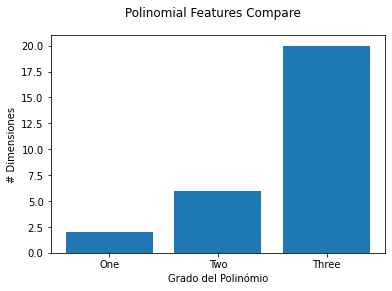

In [13]:
names = ["One", "Two", "Three"]
plt.bar(names, dimCompare)
plt.suptitle('Polinomial Features Compare')
plt.xlabel('Grado del Polinómio')
plt.ylabel('# Dimensiones')
plt.show()

# Conclusiones

El Crecimiento de las dimensiones al utilizar polinomial features crece de manera exponencial. Solamente utilizando tres dimensiones se generan 19 diferentes columnas. 